### Práctica de Web Scraping

Se va a considerar una página web de una tienda de internet: https://caorema.com

En la tienda se muestran diferentes objetos para comprar agrupados en 4 páginas. En cada página, cada objeto tiene asociada un conjunto de información: nombre, foto, descripción, precio, valoración y una etiqueta que indica si es una novedad o un top-ventas.

A continuación, se muestra una captura de la página

In [1]:
# from IPython.display import Image
# Image(filename='Captura.png')

Se pide hacer un buscador que permita recuperar información de la página. Para ello se le mostrará al usuario 4 opciones entre las que tiene que elegir: Buscar por categoría, Buscar por etiqueta top-ventas o novedad, Buscar por precio o Buscar por descripción.

__Buscar por categoría__[2,5 puntos]

Si elige esta opción se le mostrará un listado con las 5 categorías de productos:Pulseras de Nudos, Collares de Cordón, Chakras y Energía Positiva,Bisutería y Collares Largos. Para facilitar la selección se asignará un número a cada categoria, de manera que el usuario elija por número.Una vez elegido una categoría, el programa mostrará una lista de todas las objetos que pertenecen a esa categoría (asignar un número a cada objeto para que sea más fácil elegir el objeto).  A continuación, el usuario elegirá un objeto y el programa deberá mostrar la siguiente información del mismo: nombre, foto, precio, puntuación, colores, etiqueta (Top-ventas o Novedad), Caracteristicas del producto y nombre de productos relacionados.

Por último, se le preguntará si quiere realizar otra búsqueda en cuyo caso se le mostrará nuevamente el menú con los objetos de la categoría seleccionada previamente para que pueda buscar nuevos objetos. Si no quiere buscar más, se saldrá de este menú , y se mostrará el menú principal.Nuevamente podrá buscar por otra opción o bien salir completamente del programa.

__Buscar por etiqueta top-ventas o novedad__[2,5 puntos]

Si elige esta opción se le mostrará un listado con 2 opciones:Top-ventas, y Novedad. Para facilitar la selección se asignará un número a cada etiqueta, de manera que el usuario elija por número.Una vez elegido una etiqueta, el programa mostrará una lista de todas las objetos que tienen asociada esa etiqueta (asignar un número a cada objeto para que sea más fácil elegir el objeto).  A continuación, el usuario elegirá un objeto y el programa deberá mostrar la siguiente información del mismo: nombre, foto, precio, puntuación, colores, etiqueta (Top-ventas o Novedad), Caracteristicas del producto y nombre de productos relacionados.

Por último, se le preguntará si quiere realizar otra búsqueda en cuyo caso se le mostrará nuevamente el menú con los objetos de la etiqueta seleccionada previamente para que pueda buscar nuevos objetos. Si no quiere buscar más, se saldrá de este menú , y se mostrará el menú principal.Nuevamente podrá buscar por otra opción o bien salir completamente del programa.

__Buscar por precio__[2,5 puntos]

Si elige esta opción se le mostrará una caja de texto donde se le pregunte cuánto desea gastarse, de manera que el usuario introducirá una precio (puede ser un númeror decimal). El programa mostrára un listado con todos los objetos cuyo precio es igual o menor al dado (se muestra el nombre del objeteo y el precio), de manera que el usuario pueda seleccionar uno de los objetos para ver más información. Para facilitar la selección se asignará un número a cada objeto, de manera que el usuario elija por número.Una vez elegido un objeto, el programa deberá mostrar la siguiente información del mismo: nombre, foto, precio, puntuación, colores, etiqueta (Top-ventas o Novedad), Caracteristicas del producto y nombre de productos relacionados.

Por último, se le preguntará si quiere realizar otra búsqueda en cuyo caso se le mostrará nuevamente el menú con los objetos recuperados previamente para que pueda buscar nuevos objetos. Si no quiere buscar más, se saldrá de este menú ,y se mostrará el menú principal.Nuevamente podrá buscar por otra opción o bien salir completamente del programa.

__Buscar por descripción__[2,5 puntos]

Si elige esta opción se le mostrará una caja de texto donde el usuario deberá introducir una o más palabras clave. El programa mostrára un listado con todos los objetos en los que alguna de las palabras clave introducidas por el usuario aparezcan en los textos sobre las características de producto, de manera que el usuario pueda seleccionar uno de los objetos para ver más información. Para facilitar la selección se asignará un número a cada objeto, de manera que el usuario elija por número.Una vez elegido un objeto, el programa deberá mostrar la siguiente información del mismo: nombre, foto, precio, puntuación, colores, etiqueta (Top-ventas o Novedad), Caracteristicas del producto y productos relacionados.

Por último, se le preguntará si quiere realizar otra búsqueda en cuyo caso se le mostrará nuevamente el menú con los objetos recuperados previamente para que pueda buscar nuevos objetos. Si no quiere buscar más, se saldrá de este menú ,y se mostrará el menú principal.Nuevamente podrá buscar por otra opción o bien salir completamente del programa.

Para hacer  los ejercicios, tened en cuenta:

* En primer lugar, analizar la página donde se va recuperar la información, y buscar donde se encuentra la información que se necesita. Por ejemplo para el primer menú se analiza la página principal del sitio y se puede observar que la información que se busca está al principio de la página tal como se ve en la captura

In [2]:
# from IPython.display import Image
# Image(filename='Captura2.png')

* A continuación, hay que analizar el código fuente de la página web para caracterizar donde se encuentra lo que se está buscando. Siguiendo con el ejemplo, se abriría el código fuente de la página principal y se debe buscar donde aparecen los enlaces que se ven en la visualización del html de la página principal. Localizada la información se debe que caracterizar en términos de etiquetas html que es lo que caracteriza a la información buscado. En este ejemplo, se puede comprobar que que los enlaces se encuentran dentro de la etiqueta "</nav class="top_menu">"  la cual es única en toda la página. 

In [3]:
# from IPython.display import Image
# Image(filename='Captura3.png')

* A continuación se puede usar BeautifulSoup para recuperar ese trozo de código, recuperar la información que se desee,y usarla para lo que sea necesario. Se puede observar que los enlaces a las páginas se encuentran en las anclas dentro de las etiquetas "li".

In [4]:
# import urllib
# from bs4 import BeautifulSoup
# html=urllib.request.urlopen("https://caorema.com/").read()
# soup=BeautifulSoup(html, 'html.parser')
# etiqueta=soup("nav")
# print (etiqueta)

__Nota: Para realizar los procesamientos es obligatorio utilizar la libreria BeautifulSoup. No se pueden usar otras librerías__

# Normas de entrega

* Fecha tope de entrega: 20/10/2022
* La entrega se realizará subiendo al campus virtual un notebook de Jupyter con la solución. El archivo tendrá como nombre WebScraping_GrupoX donde X será el número de grupo correspondiente.


In [5]:
import requests
import re

def mostrar_producto(url):
 
    html = requests.get(url).content.decode("utf-8")
    soup = BeautifulSoup(html, 'html.parser')

    # Sección de información del producto
    info = soup.find("div", class_ = "summary entry-summary")
    nombre = info.find("h1").contents[0]
    valor_moneda = info.find("div", class_ = "woo-price-area").find("p").find("span").find("bdi").contents
    precio = str(valor_moneda[0] + valor_moneda[1].contents[0])
    puntuacion = info.find("div", class_ = re.compile("score.")).contents[0]
    
    colores = list()
    # No todos los productos tienen el apartado de colores
    try:
        tabla_colores = info.find("div", class_ = "woo-button-area").find("form").find("table").findAll("option")
        tabla_colores.pop(0)    # Eliminamos el primer elemento que contiene: "Elige una opción" para quedarnos solo con los colores
        for color in tabla_colores:
            colores.append(color.contents[0])
    except:
        pass

    etiqueta = info.find("span", class_ = re.compile("re-line-badge.")).find("span").contents[0]

    # Sección de imagen
    url_foto = soup.find("div", class_ ="woo-image-part").find("figure").find("a").get("href")
    foto = Image(url_foto, width=500)
    
    # Sección de características del producto
    caracteristicas = list()
    caracts = soup.find("div", class_="mt25").find("div", class_ = "woocommerce-Tabs-panel--description").findAll("li")
    for c in caracts:
        # Algunas características están dentro de una subetiqueta span
        if c.find("span"):
            caracteristicas.append(c.contents[0].contents[0])
        
        else:
            caracteristicas.append(c.contents[0])
    
    # Sección de productos relacionados
    seccion_relacionados = soup.find("div", class_ = "related-woo-area")
    productos_relacionados = list()
    prods = seccion_relacionados.find("div", class_ = "woocommerce").find("div", class_ = "products").findAll("h3")
    
    for prod in prods:
        productos_relacionados.append(prod.find("a").contents[0])
    
    display(foto)
    sep = "\n\t\t- "
    print(f"""
        Nombre: {nombre}
        Precio: {precio}
        Puntuación: {puntuacion}/10
        Colores: {', '.join([str(x) for x in [*colores]]) or "Único"}
        Etiqueta: {etiqueta}
        Características: \n\t\t- {sep.join([str(x) for x in [*caracteristicas]])}
        Productos relacionados: \n\t\t- {sep.join([str(x) for x in [*productos_relacionados]])}
        """)

In [6]:
def mostrar_menu(cosas):

    i = 1
    for c in cosas:
        print(f"{i} - {c[1]}")
        i += 1

## 1.Buscar por categoría

In [7]:
import requests
from bs4 import BeautifulSoup
import re
from IPython.display import Image, display

def get_categorias():

    url="https://caorema.com/"
    html = requests.get(url).content.decode("utf-8")
    soup = BeautifulSoup(html, 'html.parser')
    etiquetas=soup.findAll("nav")
    categorias = list(tuple())
    
    for etiqueta in etiquetas:
        for i in range(2, len(etiqueta.contents[0].contents)-4, 2):
            link = etiqueta.contents[0].contents[i].contents[0].get("href")
            words = link.split("/")
            nombre = words[-2].replace("-", " ").capitalize()
            categorias.append((link, nombre))

    return categorias



def get_productos(categoria):
    url = categoria
    html = requests.get(url).content.decode("utf-8")
    soup = BeautifulSoup(html, 'html.parser')
    etiquetas = soup.findAll("article")
    productos = list(tuple())
    for etiqueta in etiquetas:
        for e in etiqueta.findAll("li"):
            link = e.contents[1].get("href", None)
            nombre = e.contents[1].findAll("div")[1].contents[0]
            productos.append((link, nombre))
    return productos


def buscar_por_categoria():
    
    buscar_cat = True
    while buscar_cat:
        categorias = get_categorias()
        mostrar_menu(categorias)
        cat = int(input("Elija una categoría: ")) - 1
        buscar_prod = True
        while buscar_prod:
            print(f"\nProductos de la categoría \"{categorias[cat][1]}\":\n")
            productos = get_productos(categorias[cat][0])
            mostrar_menu(productos)
            prod = int(input("Elija un producto: ")) - 1
            print("\nInformación del producto seleccionado:\n")
            mostrar_producto(productos[prod][0])

            buscar_prod = input("¿Desea seguir consultando productos de esta categoría? (s/n): ") == "s"
        buscar_cat = input("¿Desea consultar otras categorías? (s/n): ") == "s"



## 2. Buscar por etiqueta top-ventas o novedad.

In [8]:
def buscar_por_etiqueta():
    print("TODO")

## 3. Buscar por precio.

In [9]:
import requests
from bs4 import BeautifulSoup

content = requests.get("https://caorema.com/page/2/").content.decode("utf-8")

def prod_nombre(producto) -> str:
    return producto.find("h3").find("a").contents[0]

def prod_precio(producto) -> float:
    return float(producto.find("span", class_="price").find("bdi").contents[0])

URL = "https://caorema.com"

def buscar_por_precio():

    max_price = float(input("Introduce un precio máximo: "))

    i = 1
    prods = []
    while True:

        content = requests.get(URL + f"/page/{i}").content.decode("utf-8")
        page = BeautifulSoup(content, "html.parser")

        new_prods = page.find_all("div", class_="product")

        if len(new_prods) > 0:
            prods.extend(new_prods)
            i += 1

        else: break 

    prods_baratos = [prod for prod in prods if prod_precio(prod) <= max_price]
    

    while True:
        
        for id, prod in enumerate(prods_baratos):
            print(f"    {id+1}: {prod_nombre(prod)} ({prod_precio(prod)}€)")

        opcion = int(input("Introduce una opción (0 para salir): ")) - 1

        if opcion ==  -1:
            break
    
        mostrar_producto(prods_baratos[opcion].find("h3").find("a").attrs["href"])
        print("-------------------------------------------------------------------")

## 4. Buscar por descripción.

In [10]:
def buscar_por_descripcion():
    print("TODO")

## 5. Menu principal.

1: Buscar por categoría.
2: Buscar por etiqueta.
3: Buscar por precio.
4: Buscar por descripción.
0: Salir.
1 - Pulseras con nudos de hilo y cordon
2 - Collares de cordon
3 - Chakras y energia positiva
4 - Bisuteria
5 - Collares largos

Productos de la categoría "Pulseras con nudos de hilo y cordon":

1 - Pulsera de Hilo y Cordón con Nudos y Motivos de Acero para Hombre y Mujer en Negro
2 - Pulsera de Hilo y Cordón con Nudos y Motivos de Acero para Hombre y Mujer en Azul
3 - Pulsera de Nudos de la Suerte con Colgante de Estrella de Mar
4 - Pulsera Verde de los 7 Nudos de la Suerte con Colgante de Herradura para Atraer Fortuna
5 - Pulsera Roja de los 7 Nudos de la Suerte con Colgante de Estrella para Alejar el Mal de Ojo y Atraer Fortuna
6 - Pulsera Roja y Verde de los 7 Nudos de la Suerte para Alejar el Mal de Ojo y Atraer Fortuna
7 - Pulsera Azul de Cordón y Nudos con Motivos de Acero para Hombre y Mujer
8 - Pulsera de la Suerte con Nudos y Colgante de 3 Herraduras
9 - Pulsera de Hilo

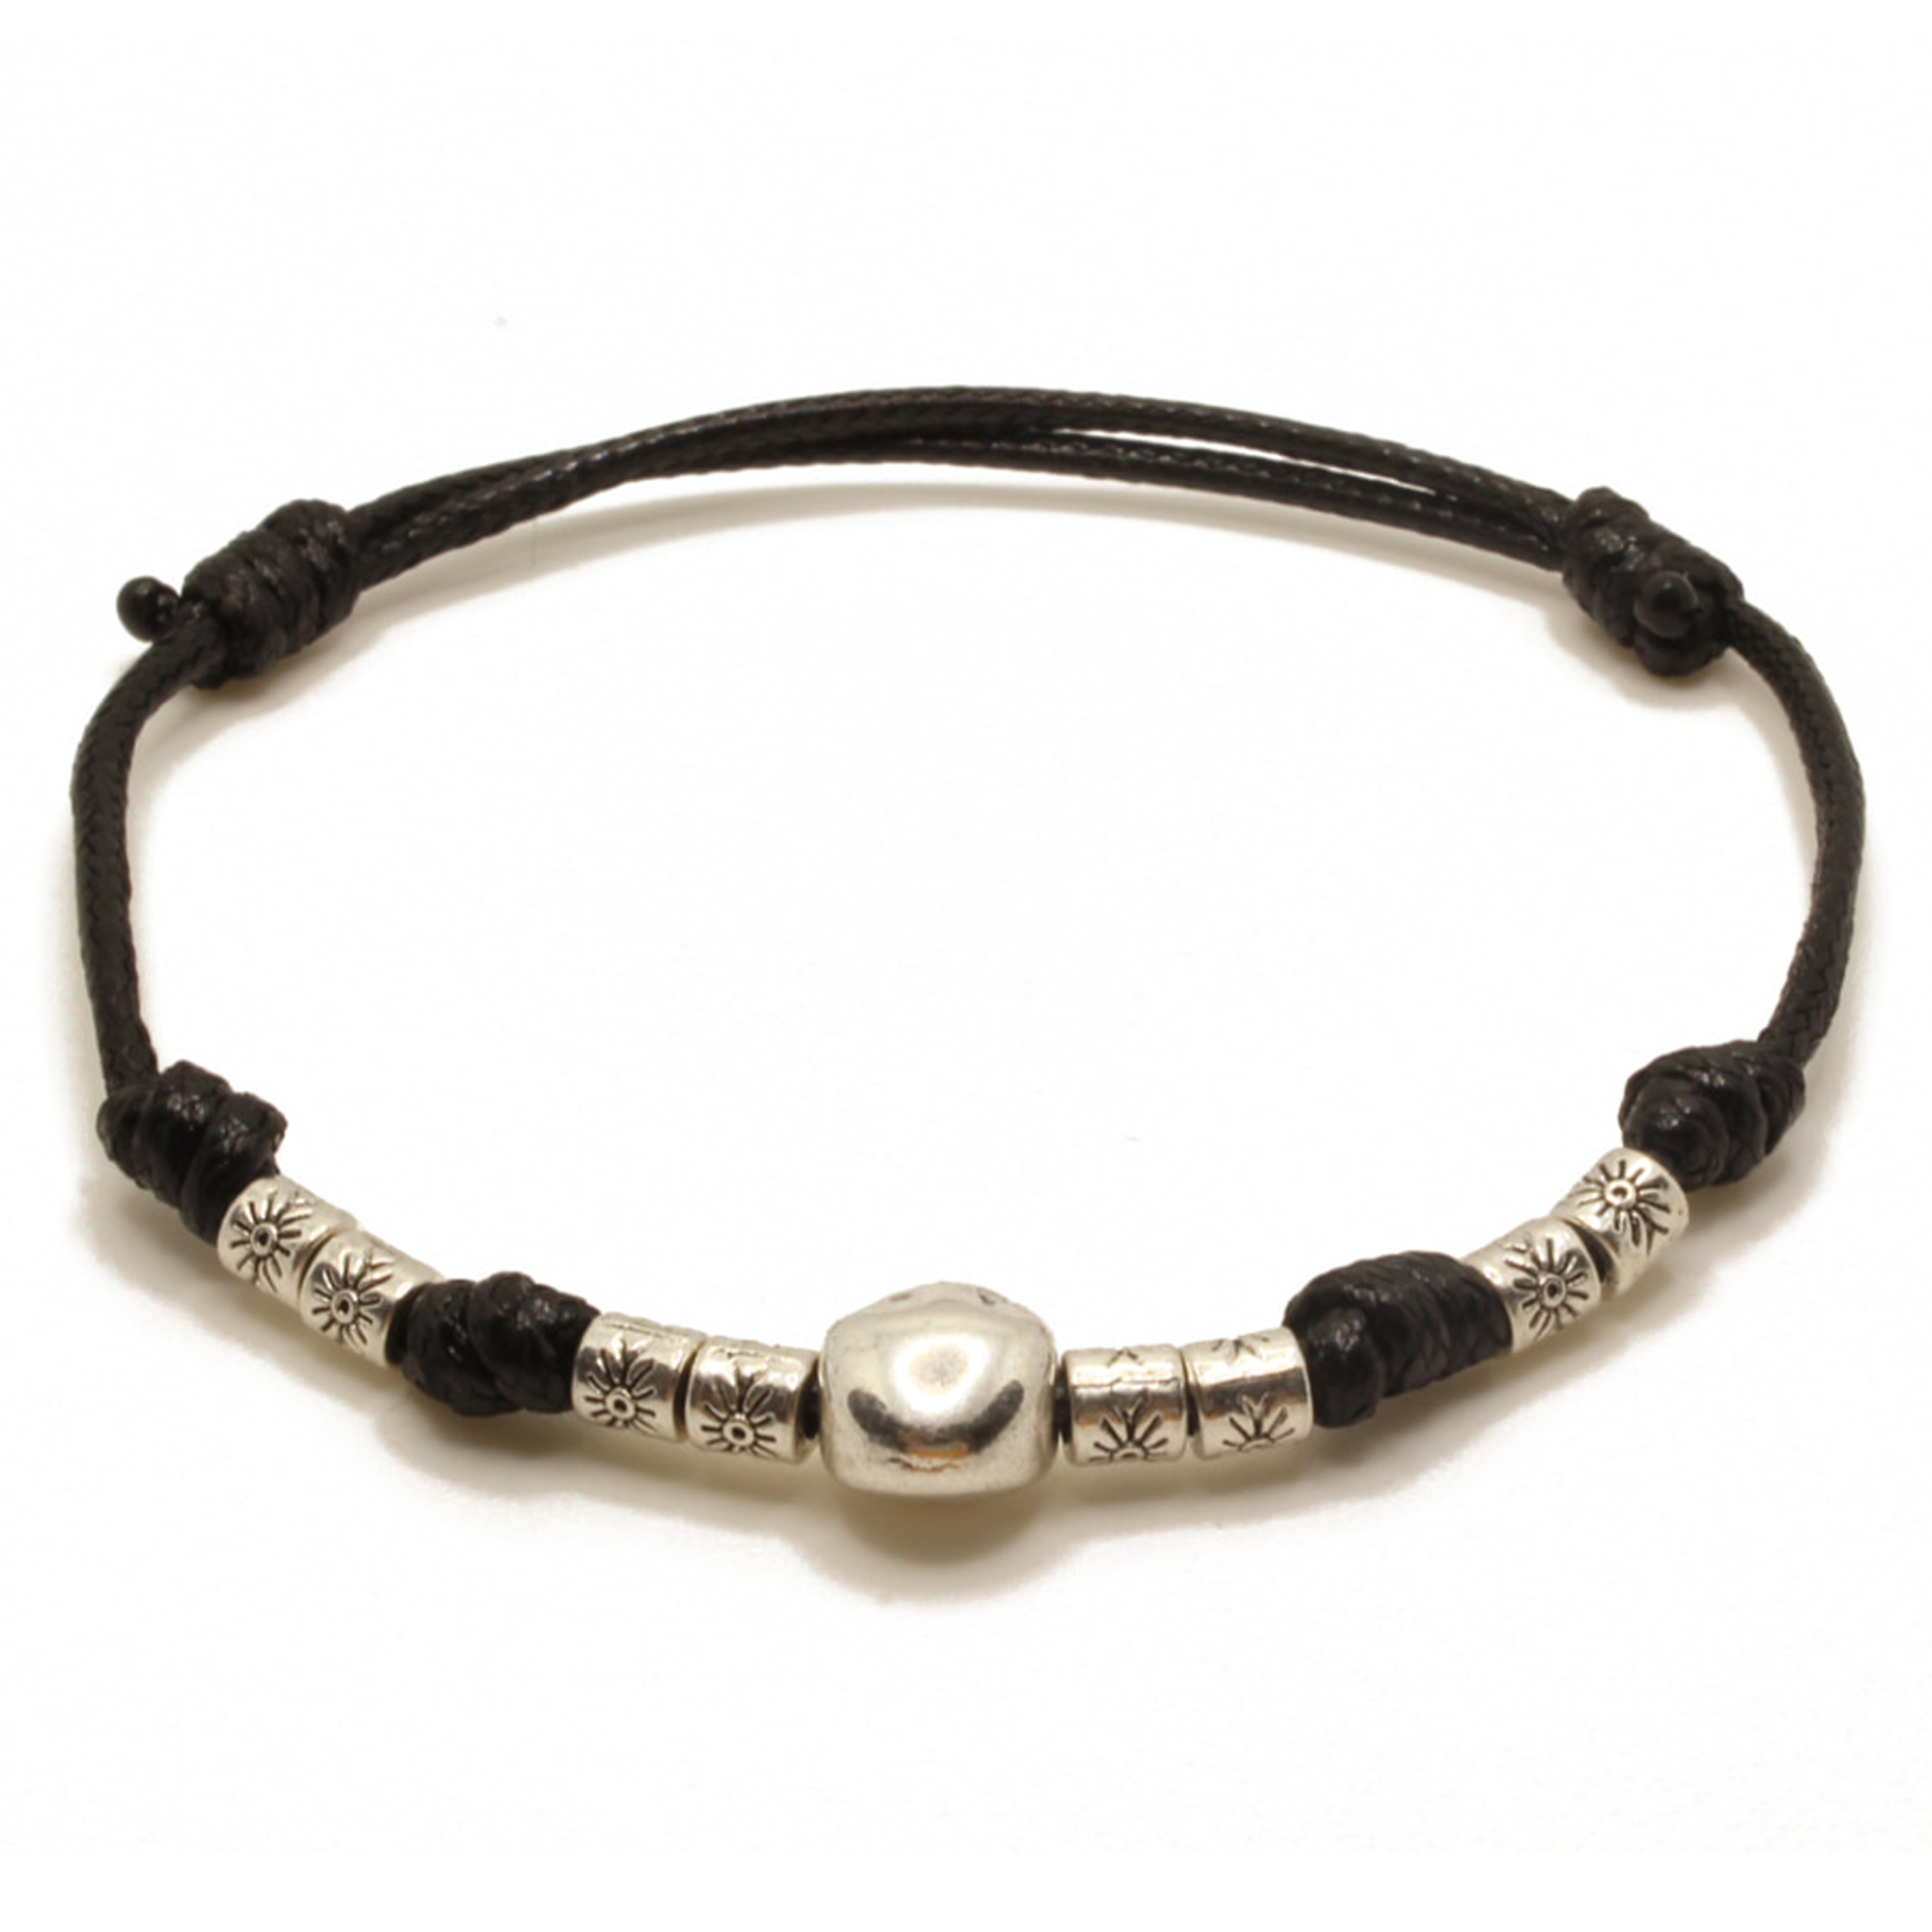


        Nombre: Pulsera de Hilo y Cordón con Nudos y Motivos de Acero para Hombre y Mujer en Negro
        Precio: 12.90€
        Puntuación: 9.7/10
        Colores: Único
        Etiqueta: Novedad
        Características: 
		- Pulsera de hilo y cordón para mujer y hombre con motivos de acero inoxidable ajustable mediante nudos corredizos de color negro
		- Diseño original y único que se ajusta a todo tipo y medidas de muñecas
		- Se trata de un pulsera que utiliza materiales de acero inoxidable, algodón y aleación de zinc
		- El grosor del cordón es de 1,5 milímetros
		- La anchura de la pulsera permite adaptarse fácilmente a muñecas con un diámetro comprendido entre los 16 y los 20 centímetros. Para muñecas de otros diámetros, consultarnos en info@caorema.com
		- Recomendación para su conservación: Para una conservación duradera, recomendamos evitar el contacto con perfumes, agua de tocador, algodón o agua con mucho cloro.
        Productos relacionados: 
		- Pulsera de Nudos de la 

In [16]:
def menu_principal():
    
    while True:
        print("1: Buscar por categoría.")
        print("2: Buscar por etiqueta.")
        print("3: Buscar por precio.")
        print("4: Buscar por descripción.")
        print("0: Salir.")

        opcion = int(input("Introduzca una opción"))
        
        if opcion == 0: break

        elif opcion == 1: buscar_por_categoria()
        elif opcion == 2: buscar_por_etiqueta()
        elif opcion == 3: buscar_por_precio()
        elif opcion == 4: buscar_por_descripcion()

menu_principal()